# Metadata

* Title: **Final Project Report**
* Class: DS 5100
* Date: 2 May 2023
* Student Name: Brett Genz
* Student Net ID: pah4rw
* This URL: https://github.com/brettgenz/montecarlo/blob/b051726b393c3a0c1742cfd18c40cc43397e00dc/Final_Project_Report.ipynb
* GitHub Repo URL: https://github.com/brettgenz/montecarlo

# The Monte Carlo Module

In [5]:
import pandas as pd
import numpy as np


class Die():
    """
    A die has N sides, or "faces", and W weights, and can be rolled to select a face.
    
    Methods:
        - roll_die
        - change_weight
        - show_die
    
    """
    
    def __init__(self, faces):
        """
        This method takes a list of values that will become the faces on the die. Values in
        the list can be characters or integers. The method initializes the weight of each
        face as 1. The method saves the faces and weights in a private data frame that can
        be used by other methods.
        """
        self.faces = faces # might want to do sort(faces) here
        if not isinstance(self.faces, list):
            raise ValueError("You must input a list of values.")
    
        x = [type(x) == str or type(x) == int for x in self.faces]
        
        if False in x:
            raise ValueError("All elements of the list must be characters or integers.")
    
        self.die_df = pd.DataFrame({
            "faces": faces,
            "weights": [1 for x in faces]
        })
        
        self.faces_type_list = list(set([type(x) for x in self.faces]))
        
    
    def change_weights(self, face, new_weight):
        """
        This method updates the weight of a single face of a die. It takes as input an 
        existing face on a die and a new weight (as a float). For validation, it checks
        whether the face exists on the die, and whether the new weight is a float or 
        can be coerced to a float. The method then finds the index of the face in self.faces,
        and sets the weight for the corresponding index in weights to the new weight.
        """
        if face not in self.faces:
            raise ValueError("The given face does not exist on this die.")
        
        if not type(float(new_weight)) == float:
            raise ValueError("The new weight must be a number.")
        
        index = self.die_df.faces.index[self.die_df.faces == face][0]
        
        self.die_df.weights[index] = new_weight
        
    
    def roll_die(self, n_rolls=1):
        """
        This method rolls the instantiated die a number of times equal to the supplied
        parameter n_rolls, and returns a pandas series of the results of the roll(s).
        """
        
        results = []
        
        for i in range(n_rolls):
            result = self.die_df.faces.sample(weights = self.die_df.weights).values[0]
            results.append(result)
        
        self.results = pd.Series(results)
        
        return results

    
    def show_die(self):
        """
        This method returns the current state of the data frame of the faces and weights
        of the die.
        """
        return self.die_df

    
class Game():
    """
    A game consists of rolling one or more dice of the same kind one or more times. Each 
    die in a given game must have the same number of sides and associated faces, but each die 
    object may have its own weights. 
    
    The class has one behavior: to play the game, which means roll all the dice a given 
    number of times.
    
    The class stores the results of its most recent play in a private data frame.
    """
    
    def __init__(self, dice):
        """
        This initializer takes one parameter: a list of already-instantiated similar Die
        objects. 
        
        The initializer tests:
        - whether the object passed is a list
        - whether each object in the list is a Die object
        - whether all dice have the same set of faces
        
        Finally, the initializer stores the list of face types for the first Die for later
        use by the Analyzer class.
        """
        
        self.dice = dice
        
        if not isinstance(self.dice, list):
            raise ValueError("You must input a list of existing Die objects.")
        
        x = [type(x) == Die for x in self.dice]
        
        if False in x:
            raise ValueError("All elements of the list must be existing Die objects.")
        
        # check whether all dice in self.dice have the same faces
        
        for i in range(1, len(self.dice)):
            if not dice[0].faces.sort() == dice[i].faces.sort():
                raise ValueError("All dice in the game must have the same faces.")
        
    
    
    def play(self, n):
        """
        This method takes a parameter for how many times the dice should be rolled.
        
        The class then saves the result of the play to a private data frame of shape N 
        rolls by M dice. The data frame uses the roll number as a named indec.
        
        The resulting data frame has columns for the roll number, the die number (its
        list index), and the face rolled in that instance.
        
        roll_number |  0  |  1  |  2  |  .  |  .  |  m  |
        -------------------------------------------------
             0      |  4  |  2  |  3  |  .  |  .  |  1  |
             1      |  1  |  5  |  2  |  .  |  .  |  2  |
             2      |  3  |  4  |  6  |  .  |  .  |  1  |
             .      |  .  |  .  |  .  |  .  |  .  |  5  |
             .      |  .  |  .  |  .  |  .  |  .  |  3  |
             n      |  6  |  1  |  5  |  4  |  2  |  6  |
        
        """
        
        self.last_play = pd.DataFrame(columns = [x for x in range(len(self.dice))],
                                      index = [x for x in range(n)])
        
        self.last_play.index.name = 'roll_number'
        
        for i in self.last_play.columns:
            self.last_play[i] = self.dice[i].roll_die(n)
        
        
    def show_last_play(self, nw_form=0):
        """
        This method simply the data frame with the results of the last play. It includes an
        additional parameter to allow a user to return the data frame in either wide (nw_form=0) 
        or narrow (nw_form=1) form.
        """
        
        if not (nw_form == 0 or nw_form == 1):
            raise ValueError("Enter 0 to return the last play in wide form or 1 to return it in narrow form.")
        
        if nw_form == 0:
            return self.last_play
        
        if nw_form == 1:
            return self.last_play.unstack()
        
        
class Analyzer():
    """
    This class takes as input the results of a single game and computes various descriptive
    statistical properties about it. These properties results are available as attributes
    of an Analyzer object.
    
    Methods:
      - jackpot
      - combo
      - face_counts_per_roll
    
    """
    
    def __init__(self, game):
        """
        This initializer takes a game object as its input parameter. 
        
        At initialization, it makes note the data type of the first die in the game's dice 
        list. Note: the initializer for the Game checks whether the list of faces on all dice 
        are identical. Therefore, the initializer only needs to know the face types of one Die.
        """
        
        self.game = game
        
        self.game_face_types = self.game.dice[0].faces_type_list
        
    
    def jackpot(self):
        """
        This method computes how many times the game resulted in all faces being identical. It
        creates a new column that calculates the length of a set created by the other rows of 
        results, and gives this cell a value of 1 if the length of the set is 1, and 0 otherwise. 
        It returns the sum of this column.
        """
        
        length = self.game.last_play.shape[0] # number of rows
        
        self.game.last_play['jackpot'] = 0
        
        width = self.game.last_play.shape[1]
        
        for i in range(length):
            if len(set(self.game.last_play.iloc[i, 0:(width-1)])) == 1:
                self.game.last_play['jackpot'].iloc[i] = 1
        
        return sum(self.game.last_play['jackpot'])
        
        
        
    def combo(self):
        """
        This method computes the distinct combinations of faces rolled, along with their counts.
        
        The combinations are sorted and stored as a multi-columned index, and then saved as a
        data frame in a public attribute.
        """
        # extract all of the rows of last_play into a list of lists, convert 
        # the list to a pd.Series, then assign my_df = series.value_counts().to_frame()
        
        all_combos = pd.Series([list(self.game.last_play.iloc[x, 0:5]) for x in range(len(self.game.last_play.index))])
        
        self.combos = all_combos.value_counts().to_frame('count')
        
        self.combos.index.name = 'unique_combos'
        
        self.combos.sort_values(by = ['count'], ascending=False)
        
        
    def face_counts_per_roll(self):
        """
        This method computes how many times per roll a given face is rolled in each event. For 
        example, if a roll of 5 dice has all sixes, then the counts for that roll would be
        6 for the face value of '6' and 0 for the other faces.
        
        The method stores the results as a data frame in a public attribute. This data frame has
        an index of the roll number and the face values as columns (i.e., the data frame is in
        wide format).
        """
        
        length = self.game.last_play.shape[0] # number of rows
        
        self.face_counts = pd.DataFrame(
            columns = [self.game.dice[0].faces[x] for x in range(len(self.game.dice[0].faces))],
            index = [x for x in range(length)]
        )
        
        self.face_counts.index.name = 'roll_number'
        
        for column in list(self.face_counts.columns):
            for row in range(len(self.face_counts.index)):
                col_index = self.face_counts.columns.get_loc(column)
                self.face_counts.iloc[row,col_index] = list(self.game.last_play.iloc[row]).count(column)
        

# Test Module

In [ ]:
import unittest
from montecarlo import Die
from montecarlo import Game
from montecarlo import Analyzer

class MonteCarloTestSuite(unittest.TestCase):

    def test_1_create_die(self):
        """
        This method tests that an instance has been created and includes the correct number of faces.
        """
        # create instance
        
        n = 6
        
        test_die = Die(list(range(1, n + 1)))
        
        test_value = (len(test_die.die_df.faces) == n)
        
        message = "Error: Incorrect value for number of faces."
        
        self.assertTrue(test_value, message)

        
    def test_2_change_weights(self):
        """
        This method tests whether or not the change_weight() method correctly updated the weight of the specified face.
        """
        # create instance
        
        n = 6
        
        test_die = Die(list(range(1, n + 1)))
        
        test_die.change_weights(n, 5)
        
        test_value = test_die.die_df.weights[n - 1] == 5
        
        message = "Error: Incorrect weight for specified face."
        
        self.assertTrue(test_value, message)
        
        
    def test_3_roll_die(self):
        """
        This method tests whether or not the roll_die() method returns the correct number of rolls.
        """
        # create instance
        
        n = 6
        
        test_die = Die(list(range(1, n + 1)))
        
        test_value = len(test_die.roll_die(n)) == n

        message = "Error: Incorrect number of rolls."
        
        self.assertTrue(test_value, message)
    
    
    def test_4_show_die(self):
        """
        This method tests whether or not the private data frame self.die_df has the correct dimensions.
        """
        # create instance
        
        n = 6
        
        test_die = Die(list(range(1, n + 1)))
        
        test_value = test_die.show_die().shape == (n, 2)
        
        message = "Error: Incorrect dimensions of self.die_df."
        
        self.assertTrue(test_value, message)
        
        
    def test_5_play(self):
        """
        This method tests whether the play method creates a last_play data frame
        with the correct number of columns (dice) and rows (number of rolls).
        """
        # create instances of dice
        
        n = 6
        
        test_die_1 = Die(list(range(1, n + 1)))
        test_die_2 = Die(list(range(1, n + 1)))
        test_die_3 = Die(list(range(1, n + 1)))
        
        test_dice_list = [test_die_1, test_die_2, test_die_3]
        
        # create instance of game
        
        test_game = Game(test_dice_list)
        
        test_game.play(4)
        
        test_value = test_game.last_play.shape == (4, 3)
        
        message = "Error: Incorrect dimensions of test_game.last_play data frame."
        
        self.assertTrue(test_value, message)
        
        
    def test_6_show_last_play(self):
        """
        This method tests whether the show_last_play() method with the default parameter
        correctly returns the last_play object in wide format.
        """
        # create instances of dice
        
        n = 6
        
        test_die_1 = Die(list(range(1, n + 1)))
        test_die_2 = Die(list(range(1, n + 1)))
        test_die_3 = Die(list(range(1, n + 1)))
        
        test_dice_list = [test_die_1, test_die_2, test_die_3]
        
        # create instance of game
        
        test_game = Game(test_dice_list)
        
        test_game.play(4)
        
        test_game.show_last_play()
        
        test_value = test_game.last_play.shape == (4, 3)
        
        message = "Error: test_game.last_play data frame did not display in wide format."
        
        self.assertTrue(test_value, message)
        
        
    def test_7_jackpot(self):
        """
        This method tests whether the jackpot() method correctly counts the number of jackpots
        in the last_play results. For this method, all dice have identical faces so that all 
        rows of last_play will be jackpots. The number of jackpots should then equal the number 
        of rolls.
        """
        # create instances of dice with all identical faces 
        
        faces = [6,6,6,6,6,6]
        
        test_die_1 = Die(faces)
        test_die_2 = Die(faces)
        test_die_3 = Die(faces)
        
        test_dice_list = [test_die_1, test_die_2, test_die_3]
        
        # create instance of game
        
        test_game = Game(test_dice_list)
        
        test_game.play(4)
        
        test_analyzer = Analyzer(test_game)
        
        test_value = test_analyzer.jackpot() == 4
        
        message = "Error: test_game.last_play data frame did not display in wide format."
        
        self.assertTrue(test_value, message)
        
        
        
    def test_8_combo(self):
        """
        This method tests whether the combo() method correctly groups and counts matches
        from the game.last_play data frame. Each die has a single face, so every row will
        have the same combo, and the count of the 
        """
        # create instances of dice
        
        test_die_1 = Die(list('U'))
        test_die_2 = Die(list('V'))
        test_die_3 = Die(list('A'))
        
        test_dice_list = [test_die_1, test_die_2, test_die_3]
        
        # create instance of game
        
        test_game = Game(test_dice_list)
        
        test_game.play(4)
        
        test_analyzer = Analyzer(test_game)
        
        test_analyzer.combo()
        
        test_value = (test_analyzer.combos.index[0] == ['U','V','A']) & (test_analyzer.combos['count'][0] == 4)
    
        message = "Error: Incorrect values for the combo and count."
        
        self.assertTrue(test_value, message)
        
        
        
    def test_9_face_counts_per_roll(self):
        """
        This method tests whether the face_counts data frame has the correct shape given 
        the number of dice and rolls.
        """
        # create instances of dice
        
        n = 6
        
        test_die_1 = Die(list(range(1, n + 1)))
        test_die_2 = Die(list(range(1, n + 1)))
        test_die_3 = Die(list(range(1, n + 1)))
        
        test_dice_list = [test_die_1, test_die_2, test_die_3]
        
        # create instance of game
        
        test_game = Game(test_dice_list)
        
        test_game.play(4)
        
        test_analyzer = Analyzer(test_game)
        
        test_analyzer.face_counts_per_roll()
        
        test_value = test_analyzer.face_counts.shape == (4, 6)
        
        message = "Error: Incorrect dimensions for the face_counts data frame."
        
        self.assertTrue(test_value, message)
        
        
        
if __name__ == '__main__':

    unittest.main(verbosity=3)

# Test Results

test_1_create_die (__main__.MonteCarloTestSuite)\
This method tests that an instance has been created and includes the correct number of faces. ... ok\
test_2_change_weights (__main__.MonteCarloTestSuite)\
This method tests whether or not the change_weight() method correctly updated the weight of the specified face. ... ok\
test_3_roll_die (__main__.MonteCarloTestSuite)\
This method tests whether or not the roll_die() method returns the correct number of rolls. ... ok\
test_4_show_die (__main__.MonteCarloTestSuite)\
This method tests whether or not the private data frame self.die_df has the correct dimensions. ... ok\
test_5_play (__main__.MonteCarloTestSuite)\
This method tests whether the play method creates a last_play data frame ... ok\
test_6_show_last_play (__main__.MonteCarloTestSuite)\
This method tests whether the show_last_play() method with the default parameter ... ok\
test_7_jackpot (__main__.MonteCarloTestSuite)\
This method tests whether the jackpot() method correctly counts the number of jackpots ... ok\
test_8_combo (__main__.MonteCarloTestSuite)\
This method tests whether the combo() method correctly groups and counts matches ... ok\
test_9_face_counts_per_roll (__main__.MonteCarloTestSuite)\
This method tests whether the face_counts data frame has the correct shape given ... ok\

----------------------------------------------------------------------\
Ran 9 tests in 0.040s\
\
OK

# Scenarios

**Code blocks with your scenarios and their outputs.**

**These should have appropriate import statements even though the code is now in the same notebook as the classes it calls.**

In [ ]:
from montecarlo import Die
from montecarlo import Game
from montecarlo import Analyzer

## Scenario 1

**Create a fair coin (with faces H and T) and one unfair coin, in which one of the faces has a weight of 5 and the other has weight of 1.**

In [9]:
coin_sides = ['H','T']

In [23]:
fair_coin = Die(coin_sides)
unfair_coin = Die(coin_sides)

In [36]:
pd.options.mode.chained_assignment = None

In [37]:
unfair_coin.change_weights('H', 5)

**Play a game of 1000 flips with all fair dice.**

In [38]:
fair_game = Game([fair_coin, fair_coin])

In [39]:
fair_game.play(1000)

**Play a game of 1000 flips with two unfair coins and one fair coin.**

In [40]:
unfair_game = Game([unfair_coin, unfair_coin, fair_coin])

In [41]:
unfair_game.play(1000)

**For each game, use an Analyzer object to determine the relative frequency of jackpots (number of jackpots over the total number of rolls).**

In [42]:
f_analyzer = Analyzer(fair_game)
u_analyzer = Analyzer(unfair_game)

In [44]:
fg_frequency = f_analyzer.jackpot()/1000

In [45]:
ug_frequency = u_analyzer.jackpot()/1000

In [48]:
sc1_results = pd.DataFrame(columns = ['Frequency'],
                           index = ['Fair Game', 'Unfair Game'],
                           data = [fg_frequency, ug_frequency]
)
sc1_results

,Frequency
Fair Game,0.520
Unfair Game,0.348


**Compare the two relative frequencies in a simple bar chart.**

<AxesSubplot:title={'center':'Relative Frequency of Jackpots for Fair Coins vs. Unfair Coins'}>

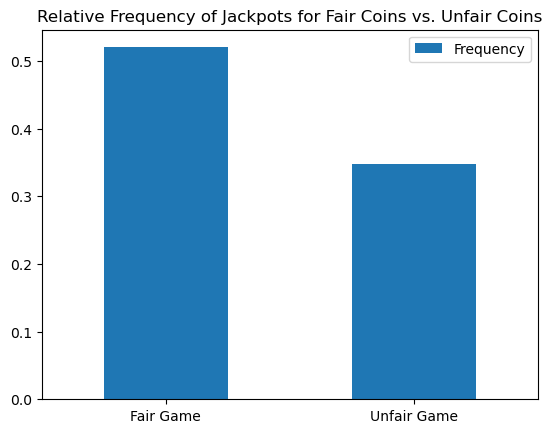

In [67]:
sc1_results.plot.bar(rot = 0, title = "Relative Frequency of Jackpots for Fair Coins vs. Unfair Coins")

## Scenario 2

**Create a far die and two unfair dice, all of 6 sides with the faces 1 through 6. One unfair die (Type 1) will weight 6 five times more than the others. The other unfair die (Type 2) will weight 1 five times more than the others.**

In [68]:
fair_die = Die([1,2,3,4,5,6])
unfair_die_1 = Die([1,2,3,4,5,6])
unfair_die_1.change_weights(6, 5)
unfair_die_2 = Die([1,2,3,4,5,6])
unfair_die_2.change_weights(1, 5)

**Play a game of 10000 rolls with 5 fair dice.**

In [70]:
dice_fair_game = Game([fair_die,fair_die,fair_die,fair_die,fair_die])
dice_fair_game.play(10000)

**Play a game of 10000 rolls with 2 unfair dice of type 1, 1 unfair die of type 2, and the rest fair dice.**

In [69]:
dice_unfair_game = Game([unfair_die_1,unfair_die_1,unfair_die_2,fair_die,fair_die])
dice_unfair_game.play(10000)

**For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.**

In [71]:
fg_analyzer = Analyzer(dice_fair_game)
ug_analyzer = Analyzer(dice_unfair_game)

In [76]:
fdg_frequency = fg_analyzer.jackpot()/10000
udg_frequency = ug_analyzer.jackpot()/10000

sc2_results = pd.DataFrame(columns = ['Frequency'],
                           index = ['Fair Dice Game', 'Unfair Dice Game'],
                           data = [fdg_frequency, udg_frequency]
                          )
sc2_results

,Frequency
Fair Dice Game,0.0010
Unfair Dice Game,0.0009


<AxesSubplot:title={'center':'Relative Frequency of Jackpots for Fair Dice vs. Unfair Dice'}>

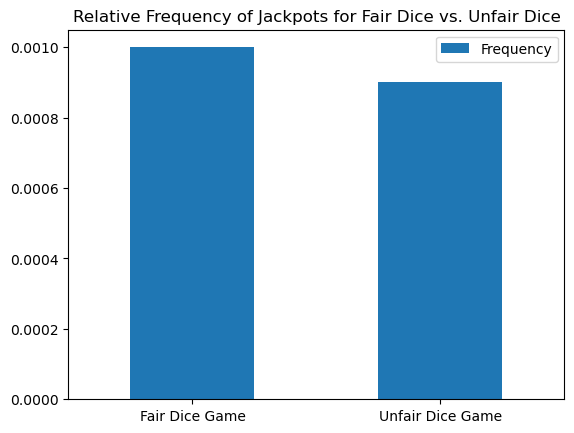

In [78]:
sc2_results.plot.bar(rot = 0, title = "Relative Frequency of Jackpots for Fair Dice vs. Unfair Dice")

**Compute the 10 most frequent combinations of faces for each game. Plot each of these as bar charts.**

In [72]:
fg_analyzer.combo()
ug_analyzer.combo()

<AxesSubplot:title={'center':'Most Frequent Combos from 10000 Rolls'}, ylabel='Unique Combos'>

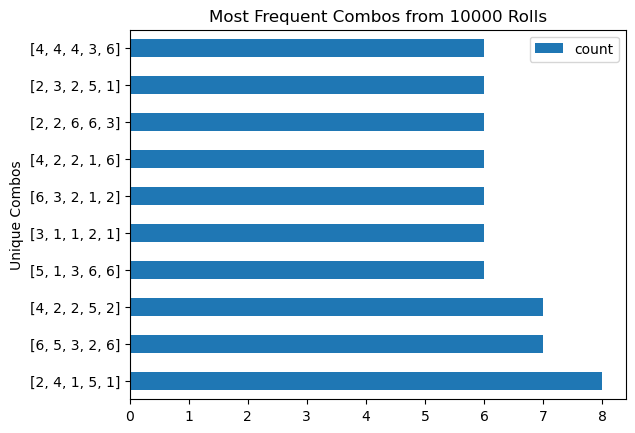

In [139]:
fg_analyzer.combos.head(10).plot.barh(title = "Most Frequent Combos: 10000 Rolls with Fair Dice",
                                     xlabel = "Unique Combos")

<AxesSubplot:title={'center':'Most Frequent Combos: 10000 Rolls with Unfair Dice'}, ylabel='Unique Combos'>

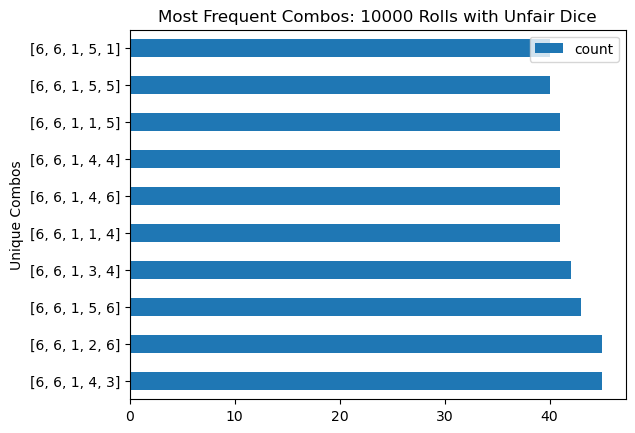

In [140]:
ug_analyzer.combos.head(10).plot.barh(title = "Most Frequent Combos: 10000 Rolls with Unfair Dice",
                                     xlabel = "Unique Combos")

## Scenario 3

**Create a "die" of letters from a to z with weights based on their frequency of usage.**

In [120]:
letter_weights = pd.read_csv('letter_weights.csv')

In [122]:
letters = list(letter_weights['faces'])

In [123]:
alpha_die = Die(letters)

In [124]:
alpha_die.die_df = letter_weights

**Play a game using 5 of these dice with 1000 rolls.**

In [132]:
alpha_game = Game([alpha_die, alpha_die, alpha_die, alpha_die, alpha_die])
alpha_game.play(1000)

**How many combos look like actual English words?**

In [133]:
alpha_analyzer = Analyzer(alpha_game)
alpha_analyzer.combo()

In [134]:
alpha_analyzer.combos.head(50)

,count
unique_combos,
"[E, I, S, P, E]",2
"[O, Y, L, N, E]",1
"[A, U, I, H, E]",1
"[E, C, N, W, R]",1
"[H, T, F, R, S]",1
"[L, O, I, E, A]",1
"[B, T, L, C, C]",1
"[D, T, F, I, I]",1
"[T, W, H, O, O]",1


**Based on a relative eye count, what is the relative frequency of these words versus the rest?**

After running a couple iterations of this game and glancing through the first 50 each time, at most only 2 or 3 out of each first 50 combos vaguely resemble English words. Often, none of the first 50 even vaguely look like English words.

# Directory Listing

A code block that executes the following bash command: 

```bash
!ls -lRF -o
```

In [1]:
!ls -lRF -o

total 56
-rw-r--r--@ 1 genzfammacmini  27610 Apr 28 08:25 Final_Project_Report.ipynb
drwxr-xr-x  3 genzfammacmini     96 Apr 27 21:25 __pycache__/
drwxr-xr-x@ 6 genzfammacmini    192 Apr 27 22:13 montecarlo_package/

./__pycache__:
total 24
-rw-r--r--  1 genzfammacmini  10473 Apr 27 21:25 montecarlo.cpython-39.pyc

./montecarlo_package:
total 8
drwxr-xr-x  9 genzfammacmini  288 Apr 27 23:09 montecarlo_simulator/
-rw-r--r--  1 genzfammacmini  394 Apr 27 22:13 setup.py

./montecarlo_package/montecarlo_simulator:
total 80
-rw-r--r--  1 genzfammacmini     21 Apr 27 21:42 __init__.py
drwxr-xr-x  3 genzfammacmini     96 Apr 27 22:59 __pycache__/
-rw-r--r--  1 genzfammacmini   9969 Apr 27 21:25 montecarlo.py
-rw-r--r--  1 genzfammacmini   1399 Apr 27 23:06 montecarlo_test_results.txt
-rw-r--r--  1 genzfammacmini  11146 Apr 27 23:09 montecarlo_testbed.ipynb
-rw-r--r--  1 genzfammacmini   6892 Apr 27 21:29 montecarlo_tests.py

./montecarlo_package/montecarlo_simulator/__pycache__:
total 24
-rw-

# Installation Output Listing
    
A code block that executes the code to install your your package and outputs a successful installation.

In [3]:
pip install -e .

Obtaining file:///Users/genzfammacmini/Documents/GitHub/Monte_Carlo_Simulator/montecarlo_package
  Preparing metadata (setup.py) ... done
  Attempting uninstall: booklover
    Found existing installation: booklover 0.1
    Uninstalling booklover-0.1:
      Successfully uninstalled booklover-0.1
  Running setup.py develop for booklover
Note: you may need to restart the kernel to use updated packages.
